# Realizando a conexão com o driver

In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [4]:
%cd '/gdrive/My Drive/PDFS'
%ls

/gdrive/My Drive/PDFS
'comorbidades  com doses  e data..csv'
 comorbidade.txt
 Contador_ID.txt
 controle_mensal_amostras_fora_padrao.csv
 controle_mensal_infraestrutura_operacionais.csv
'dados publicacao.csv'
 Download_arquivos_01_11_2021.txt
 Download_arquivos_28_10_2021.txt
 Download_arquivos_29_10_2021.txt
 Download_arquivos_31_10_2021.txt
 new.csv


# Importando a base de dados

In [5]:
import zipfile
import pandas as pd
import time

# Realizando o download da base

dados = !wget --no-check-certificate https://sage.saude.gov.br/dados/sisagua/controle_mensal_parametros_basicos_2021.zip

# Pegando os CSV's que se encontravam zipados

with zipfile.ZipFile('controle_mensal_parametros_basicos_2021.zip',"r") as zip_ref:
    zip_ref.extractall("Sisagua")

time.sleep(20)

%cd 'Sisagua'
%ls

# Lendo o Dataframe

df = pd.read_csv('controle_mensal_parametros_basicos_2021.csv', encoding='latin_1',sep=';',decimal=',',
                 dtype={'Código IBGE':'object','CNPJ da Instituição':'object',r'CNPJ do escritório regional/local':'object'})

# Visão geral do formato das colunas

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659708 entries, 0 to 9659707
Data columns (total 22 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Região Geográfica                  object 
 1   UF                                 object 
 2   Regional de Saúde                  object 
 3   Código IBGE                        object 
 4   Município                          object 
 5   Tipo da Instituição                object 
 6   Sigla da Instituição               object 
 7   Nome da Instituição                object 
 8   CNPJ da Instituição                object 
 9   Nome do escritório regional/local  object 
 10  CNPJ do escritório regional/local  object 
 11  Tipo da Forma de Abastecimento     object 
 12  Código Forma de abastecimento      object 
 13  Nome da Forma de Abastecimento     object 
 14  Nome da ETA / UTA                  object 
 15  Tipo de Filtração                  object 
 16  Ano de referência 

# Contagem de valores nulos

In [9]:
df.isnull().astype(int).sum()

Região Geográfica                          0
UF                                         0
Regional de Saúde                          0
Código IBGE                                0
Município                                  0
Tipo da Instituição                   154570
Sigla da Instituição                 6108577
Nome da Instituição                   154570
CNPJ da Instituição                   154570
Nome do escritório regional/local    6108577
CNPJ do escritório regional/local    6108577
Tipo da Forma de Abastecimento             0
Código Forma de abastecimento              0
Nome da Forma de Abastecimento             0
Nome da ETA / UTA                    6823359
Tipo de Filtração                    1875811
Ano de referência                          0
Mês de referência                          0
Ponto de Monitoramento                     0
Parâmetro                                  0
Campo                                      0
Valor                                      0
dtype: int

# Conferindo se existem 27 UF's

In [10]:
df['UF'].value_counts()

SP    4575825
RS    1505002
PR     779998
MG     731207
SC     345059
BA     334077
GO     174130
CE     162760
MA     159844
MS     130281
MT     124403
TO     124363
RJ     121795
ES      96859
AL      56480
PE      40446
PB      34671
DF      31947
RN      30443
SE      27263
PI      19056
AM      18613
PA      16214
RR       9544
AC       5470
RO       3641
AP        317
Name: UF, dtype: int64

# Conferindo se as 5 regiões estão corretas

In [11]:
df['Região Geográfica'].value_counts()

SUDESTE         5525686
SUL             2630059
NORDESTE         865040
CENTRO-OESTE     460761
NORTE            178162
Name: Região Geográfica, dtype: int64

# Número de municípios distintos presentes na base

In [12]:
df['Município'].value_counts().count()

4313

# Conferindo se o Código IBGE está indexado corretamente

In [13]:
(df.drop_duplicates(subset ="Código IBGE", keep = 'last')['Código IBGE']).to_csv('new.csv', index=False)

Existem 31 códigos IBGE que não tiveram correspondência com a base disponibilizada pelo Ministério da saúde, sendo estes:

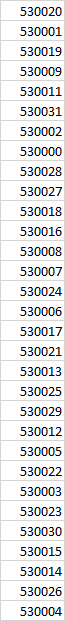


Conferindo quais municipios são referentes os códigos do IBGE

In [55]:
df[df['Código IBGE']=='530004'].head(1)

,Região Geográfica,UF,Regional de Saúde,Código IBGE,Município,Tipo da Instituição,Sigla da Instituição,Nome da Instituição,CNPJ da Instituição,Nome do escritório regional/local,CNPJ do escritório regional/local,Tipo da Forma de Abastecimento,Código Forma de abastecimento,Nome da Forma de Abastecimento,Nome da ETA / UTA,Tipo de Filtração,Ano de referência,Mês de referência,Ponto de Monitoramento,Parâmetro,Campo,Valor
1699916,CENTRO-OESTE,DF,UNICA,530004,BRAZLANDIA,Regional,CAESB,COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO ...,82024000137,CAESB REGIONAL UNICA,82024000137,SAA,S530004000001,BRAZLÂNDIA,ETA BRAZLÂNDIA (ETA.BRZ.001),SEM FILTRAÇÃO,2021,2,Pós-filtração ou Pré-desinfecção,Turbidez (uT),Número de amostras analisadas,672.0


# Tipos de instituições presentes na base

In [15]:
df['Tipo da Instituição'].value_counts()

Local       5954007
Regional    3551131
Name: Tipo da Instituição, dtype: int64

# Siglas das 66 instituições presentes no banco com suas respectivas frequências

Algumas siglas se encontram cortadas ou com presença de espaçamentos na sua escrita

In [16]:
pd.options.display.max_rows=1000

In [17]:
df['Sigla da Instituição'].value_counts()

SABESP        430117
COPASA        367384
SANEPAR       365644
CORSAN        343063
EMBASA        291492
CASAN         163198
SANEAGO       146725
CAGECE        113773
LACUA SIST    107730
ESSENCIAL      93823
KF             92950
FV             83348
SANESUL        77503
SANEATINS      71400
CESAN          52752
ARTIBRAS       43602
COMPESA        34102
SISAR          33496
LABORPLAN      33164
CAESB          31947
CEDAE          31786
COPANOR        30830
HIDROFORTE     30439
CAGEPA         30153
CAEMA          30014
CAERN          29284
AGUA E SOL     28194
DESO           25546
ATS            25316
PRECISAO T     21826
ECO DIEHL      17207
BRK AMBIEN     16100
LICS R         15118
CASAL          15047
ENTREVIAS      14703
VPAULISTA      13929
BIOSUL         12783
AUTOBAN        12317
CART           12047
SOFT SUL P     11574
SPVIAS         11360
AB TRIANGU      7743
COSAMA          7129
GRILLO          6915
RENOVIAS        5949
EDSON LUIS      5738
AB COLINAS      5706
INTERVIAS    

# Conferindo se existe nomes de instituições preenchidos como número

In [19]:
instituicao = list((df.drop_duplicates(subset ="Nome da Instituição", keep = 'last')['Nome da Instituição']))

In [20]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 8605})


# Conferindo se possui string na variavel CNPJ

In [21]:
CNPJ = list((df.drop_duplicates(subset ="CNPJ da Instituição", keep = 'last')['CNPJ da Instituição']))

In [22]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = isinstance(CNPJ[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 9113, False: 1})


# Analisando o tamanho dos CNPJ's

In [23]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = sum(len(i) for i in CNPJ[i])
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({14: 5998, 13: 2795, 12: 293, 11: 21, 10: 4, 9: 2})


# Conferindo se o nome da instituição regional / local esta preenchido como string

In [56]:
instituicao = list((df.drop_duplicates(subset ="Nome do escritório regional/local", keep = 'last')['Nome do escritório regional/local']))

In [59]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 613})


# Conferindo se possui valores textuais na variavel CNPJ do escritório regional/local

In [57]:
CNPJ = list((df.drop_duplicates(subset ="CNPJ do escritório regional/local", keep = 'last')['CNPJ do escritório regional/local']))

In [58]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = isinstance(CNPJ[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 432, False: 1})


# Conferindo a frequência de caracteres na variável CNPJ do escritório regional/local

In [60]:
instituicao = list((df.drop_duplicates(subset ="CNPJ do escritório regional/local", keep = 'last')['CNPJ do escritório regional/local']))

In [61]:
frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = sum(len(i) for i in instituicao[i])
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({14: 352, 13: 76, 12: 3, 11: 1})


# Tipo da forma de abastecimento

In [62]:
df['Tipo da Forma de Abastecimento'].value_counts()

SAC    4947548
SAA    4712160
Name: Tipo da Forma de Abastecimento, dtype: int64

# Conferindo se tem nome preenchido apenas com números

In [63]:
instituicao = list((df.drop_duplicates(subset ="Nome da Forma de Abastecimento", keep = 'last')['Nome da Forma de Abastecimento']))

In [64]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 22229, True: 6})


# Análise do ano de referência

In [65]:
df['Ano de referência'].value_counts()

2021    9659708
Name: Ano de referência, dtype: int64

# Mês de referência



In [66]:
df['Mês de referência'].value_counts()

6     907230
1     902309
2     893761
4     891872
7     890492
3     888826
8     884845
5     883359
9     865828
10    817008
11    713458
12    120720
Name: Mês de referência, dtype: int64

# Ponto de Monitoramento

In [67]:
df['Ponto de Monitoramento'].value_counts()

SAÍDA DO TRATAMENTO                           2464109
PONTO DE CONSUMO                              2444267
Saída do tratamento (para água canalizada)    2410622
SISTEMA DE DISTRIBUIÇÃO                       1856916
Pós-filtração ou Pré-desinfecção               483794
Name: Ponto de Monitoramento, dtype: int64

# Campo

Existem diferentes classificações na variável, sendo que algumas delas se encontram incompletas

In [68]:
df['Campo'].value_counts()

Número de amostras analisadas                       2572529
Percentil 95                                         476575
N de amostras com presença de coliformes totais      388848
N de amostras com ausência de coliformes totais      388829
Número de dados <= 15,0 uH                           386202
Número de dados > 15,0 uH                            386201
Número de dados < 0,2 mg/L                           384725
Número de dados > 2,0 mg/L e <= 5,0mg/L              383020
Número de dados > 5,0 mg/L                           383018
Número de dados >= 0,2 mg/L e <= 2,0mg/L             383018
N de amostras com presença para Escherichia coli     377427
N de amostras com ausência para Escherichia coli     377418
Número de dados > 9,0                                352971
Número de dados < 6,0                                352969
Número de dados >= 6,0 e <= 9,0                      352969
Número de dados > 5,0 uT                             290946
Número de dados <= 5,0 uT               

# Valor

In [69]:
Valor = list((df.drop_duplicates(subset ="Valor", keep = 'last')['Valor']))

In [70]:
frequencia = []

for i in range(0,len(Valor)):
  try:
    result = isinstance(Valor[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 12308})


# Realizando a busca pela chave primária

In [71]:
(df.groupby(['Código Forma de abastecimento', 'Município','Mês de referência','Ponto de Monitoramento','Tipo de Filtração','Parâmetro','Campo']).size()).value_counts()

1     7140240
2       79880
3       30734
4       16028
5       10849
6        5641
7        4426
8        3412
9        3260
11       1438
10       1406
12       1388
15        901
17        813
23        554
16        501
21        494
13        463
14        319
19        300
27        244
26        204
20        163
22        131
30        130
24        108
18        104
25         79
29         74
28          6
dtype: int64